In [63]:
import numpy as np
np.random.seed(11)
arr = np.random.randint(0,100,30)
print(arr)
print(arr.max())
print(arr.argmax())
print(arr.mean())
mat = arr.reshape((6,5))
print(mat)
mat[:2,:]=0
print(mat)

[25 63 80 91 81 55 13 76 33 71 82 24 92 48 32 45  4 34 12  1 74 37 84 81
 91 24 17 67 70 43]
92
12
51.666666666666664
[[25 63 80 91 81]
 [55 13 76 33 71]
 [82 24 92 48 32]
 [45  4 34 12  1]
 [74 37 84 81 91]
 [24 17 67 70 43]]
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [82 24 92 48 32]
 [45  4 34 12  1]
 [74 37 84 81 91]
 [24 17 67 70 43]]


In [64]:
# !pip install Pillow
from PIL import Image
img = Image.open("cat.jpg").resize((200,200))
type(img)

PIL.Image.Image

(200, 200, 3)


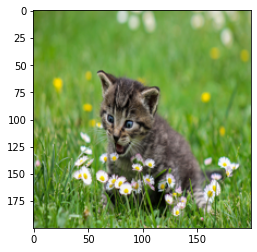

In [39]:
im_arr = np.asarray(img)
print(im_arr.shape) #height=200,width=200,no of channel=3(rgb)
plt.imshow(im_arr)

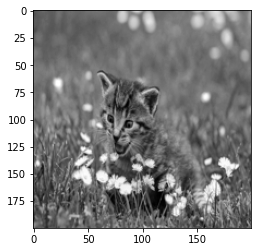

In [66]:
im_red = im_arr[:,:,0] #red channel
plt.imshow(im_red, cmap='gray') #default viridis will be used if cmap gray not specified

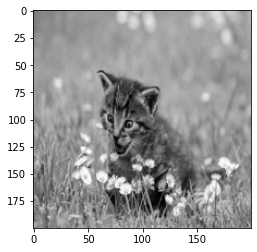

In [67]:
im_blue = im_arr[:,:,1] #blue channel
plt.imshow(im_blue, cmap='gray')

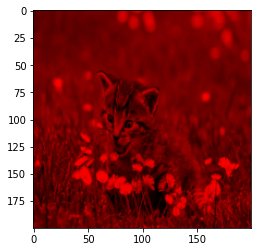

In [68]:
arr = im_arr.copy()
arr[:,:,1] = 0 #zero blue channel
arr[:,:,2] = 0 #zero green channel
plt.imshow(arr) #only red channel can be visualised, other channels zeroed.

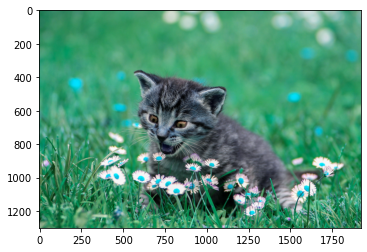

In [76]:
import cv2
img = cv2.imread("cat.jpg")
plt.imshow(img)
# Matplotlib expects RGB RED GREEN BLUE
# OPENCV expects BGR BLUE GREEN RED

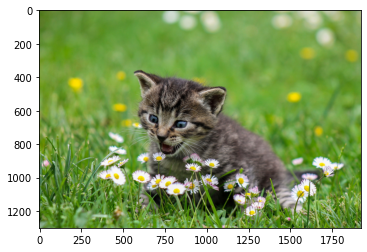

In [78]:
import cv2
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #fix by taking in BGR converting to RGB
plt.imshow(fix_img)

(1300, 1920)


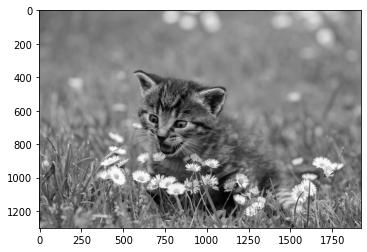

In [83]:
img_gray = cv2.imread("cat.jpg",cv2.IMREAD_GRAYSCALE)
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray')

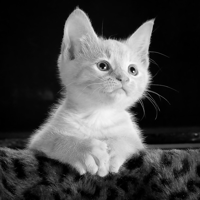

In [12]:
Image.open("cat1.jpg").convert('L').resize((200,200))

In [13]:
a = Image.open("cat1.jpg").convert('L')

In [14]:
a.thumbnail((128,128))

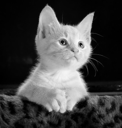

In [15]:
a

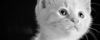

In [16]:
box = (0,30,100,70)
a.crop(box)

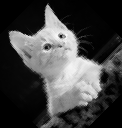

In [17]:
a.rotate(45)

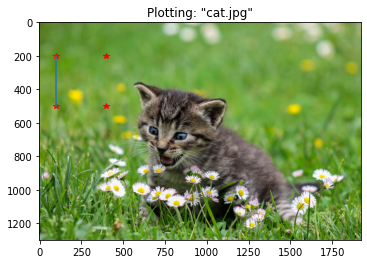

In [22]:
# !pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
# read image to array
im = np.array(Image.open('cat.jpg'))
# plot the image
plt.imshow(im)
# some points
x = [100,100,400,400]
y = [200,500,200,500]
# plot the points with red star-markers
plt.plot(x,y,'r*')
# line plot connecting the first two points
plt.plot(x[:2],y[:2])
# add title and show the plot
plt.title('Plotting: "cat.jpg"')
plt.show()

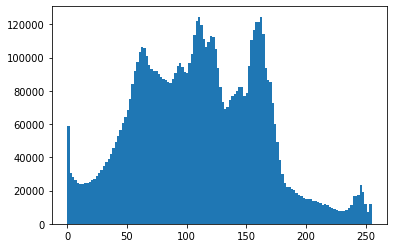

In [19]:
plt.figure()
plt.hist(im.flatten(),128)
plt.show()

In [20]:
im = np.array(Image.open('cat.jpg'))
print("Array generated from color photo")
print(im.shape)
print(im.dtype)
im = np.array(Image.open('cat.jpg').convert('L'))
print("Array generated from grayscale photo")
print(im.shape)
print(im.dtype)
im = np.array(Image.open('cat.jpg').convert('L'),'f')
print("Float32 array generated from grayscale photo")
print(im.shape)
print(im.dtype)

Array generated from color photo
(1300, 1920, 3)
uint8
Array generated from grayscale photo
(1300, 1920)
uint8
Float32 array generated from grayscale photo
(1300, 1920)
float32


# Histogram equalisation
##### Add contrast to image

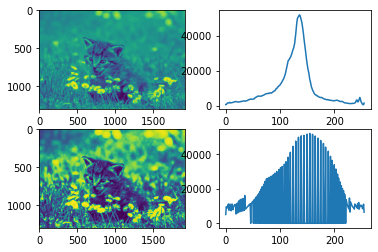

In [21]:
# !pip install opencv-python
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('cat.jpg',0)
hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
img_2 = cv2.equalizeHist(img)
hist2 = cv2.calcHist([img_2],[0],None,[256],[0,256])
plt.subplot(221),plt.imshow(img);
plt.subplot(222),plt.plot(hist1);
plt.subplot(223),plt.imshow(img_2);
plt.subplot(224),plt.plot(hist2);

# Principal Component Analysis of image(or a big dataset)
##### Principal Component Analysis or PCA is a dimensionality reduction technique for data sets with many features or dimensions. It uses linear algebra to determine the most important features of a dataset. After these features have been identified, you can use only these features to train a machine learning model and improve performance without sacrificing accuracy.

Text(0.5, 1.0, 'Second image: Digit 0')

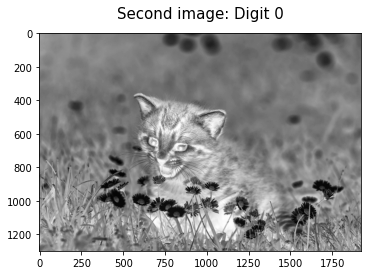

In [22]:
img = cv2.imread('cat.jpg',0)
plt.imshow(img, cmap='gray_r')
plt.title('Second image: Digit 0', fontsize=15, pad=15)

In [23]:
print(img.min())
print(img.max())

0
255


(640, 612, 3)


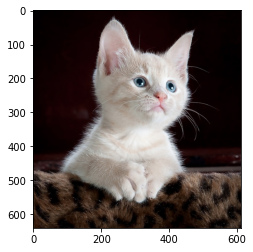

In [24]:
import matplotlib.image as mplib 
import matplotlib.pyplot as plt
import numpy as np
# !pip install -U scikit-learn
from sklearn.decomposition import PCA

img = mplib.imread('cat1.jpg')
print(img.shape)
plt.imshow(img)

In [25]:
image_sum = img.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

(640, 612)
1.0


Number of components explaining 95% variance: 19
19 out of 612 is needed to explain 95% of the variance in the image.


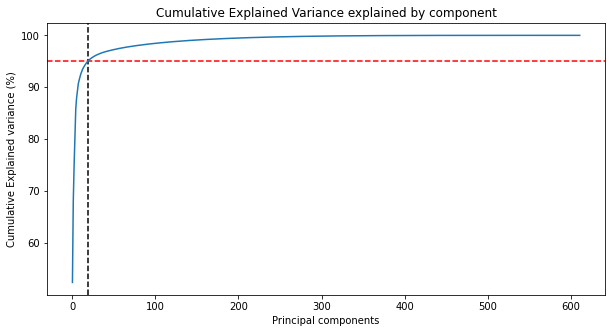

In [26]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA

pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
print(f"{str(k)} out of {len(pca.components_)} is needed to explain 95% of the variance in the image.")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

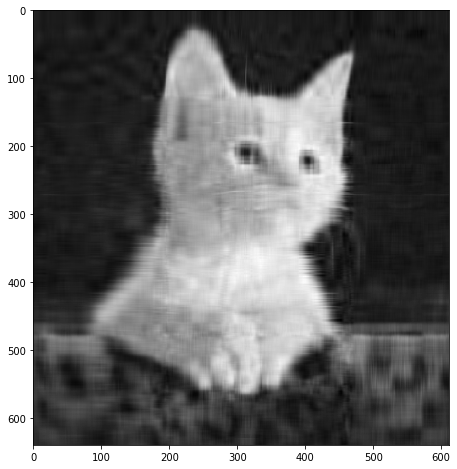

In [27]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

# Gaussian blur

In [28]:
import cv2
import numpy
  
# read image
src = cv2.imread('cat1.jpg', cv2.IMREAD_UNCHANGED)
 
# apply guassian blur on src image
dst = cv2.GaussianBlur(src,(5,5),cv2.BORDER_DEFAULT)
 
# display input and output image
cv2.imshow("Gaussian Smoothing",numpy.hstack((src, dst)))
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

# Image derivatives
##### Sobel and Scharr derivatives are useful for finding edge by locate the places in the image where the pixel intensity changes in a drastic manner.

In [29]:
image = cv2.imread('cat1.jpg', cv2.IMREAD_UNCHANGED)
sobel_X = cv2.Sobel(image, cv2.CV_64F, 1, 0) 
sobel_X_abs = np.uint8(np.absolute(sobel_X)) 
sobel_Y = cv2.Sobel(image, cv2.CV_64F,0, 1) 
sobel_Y_abs = np.uint8(np.absolute(sobel_Y)) 
sobel_XY_combined = cv2.bitwise_or(sobel_Y_abs,sobel_X_abs) 

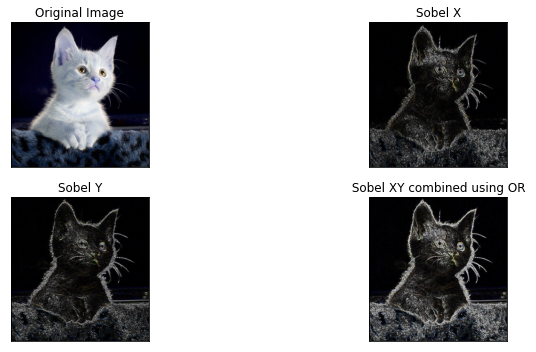

In [30]:
titles = ['Original Image','Sobel X','Sobel Y', ' Sobel XY combined using OR ']
images = [image,sobel_X_abs, sobel_Y_abs, sobel_XY_combined]
plt.figure(figsize=(13,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [31]:
image = cv2.imread('cat1.jpg', cv2.IMREAD_UNCHANGED)
scharr_X = cv2.Scharr(image, cv2.CV_64F, 1, 0) 
scharr_X_abs = np.uint8(np.absolute(scharr_X)) 
scharr_Y = cv2.Scharr(image, cv2.CV_64F, 0, 1) 
scharr_Y_abs = np.uint8(np.absolute(scharr_Y)) 
scharr_XY_combined = cv2.bitwise_or(scharr_Y_abs,scharr_X_abs) 

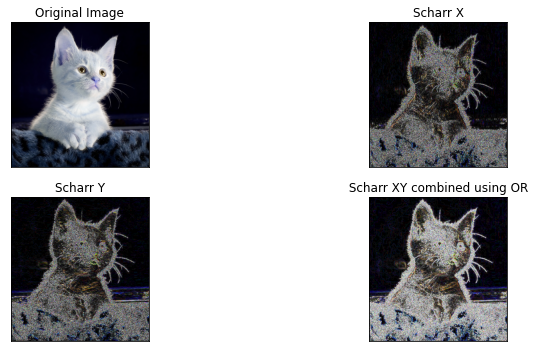

In [32]:
titles = ['Original Image','Scharr X','Scharr Y', ' Scharr XY combined using OR ']
images = [image,scharr_X_abs, scharr_Y_abs, scharr_XY_combined]
plt.figure(figsize=(13,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [33]:
image = cv2.imread('cat1.jpg', cv2.IMREAD_UNCHANGED)
lap_1 = cv2.Laplacian(image, cv2.CV_64F)
lap_1_abs = np.uint(np.absolute(lap_1))
lap_2 = cv2.Laplacian(image, cv2.CV_64F, ksize=7)
lap_2_abs = np.uint(np.absolute(lap_2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


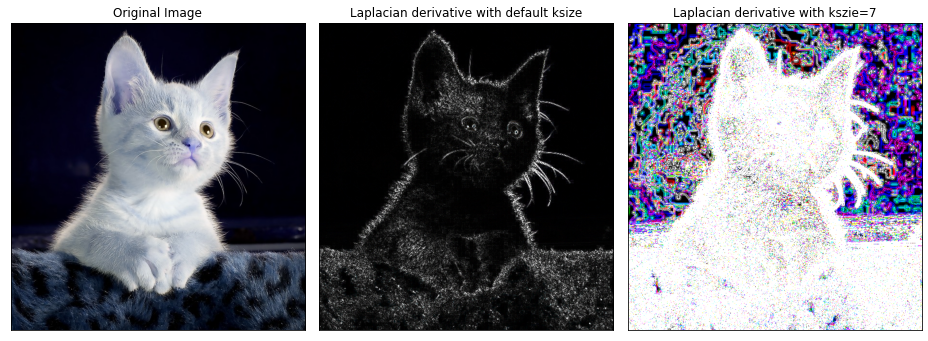

In [34]:
titles = ['Original Image',"Laplacian derivative with default ksize", 'Laplacian derivative with kszie=7']
images = [image,lap_1_abs,lap_2_abs]
plt.figure(figsize=(13,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

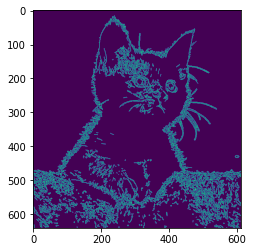

In [35]:
image = cv2.imread('cat1.jpg', cv2.IMREAD_UNCHANGED)
img_canny = cv2.Canny(img,100,200)
plt.imshow(img_canny)

# Morphology
##### Image processing base on the shape. Framework for counting object

In [36]:
import cv2 as cv
import numpy as np
img = cv.imread('6.jpg',0)
kernel = np.ones((5,5),np.uint8)

In [37]:
erosion = cv.erode(img,kernel,iterations = 1)
dilation = cv.dilate(img,kernel,iterations = 1)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

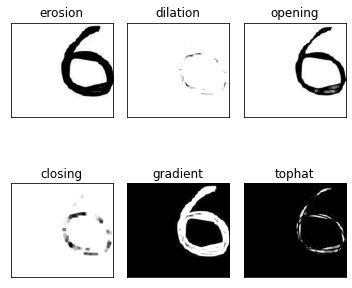

In [38]:
titles = ['erosion','dilation', 'opening', 'closing','gradient','tophat']
images = [erosion,dilation, opening, closing, gradient, tophat]
plt.figure(figsize=(5,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# Local Image Descriptors

# Harris Corner Detector

In [39]:
import numpy as np
import cv2 as cv
filename = 'shape.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

# SIFT(Scale-Invariant Feature Transform)
##### Detection of interest points

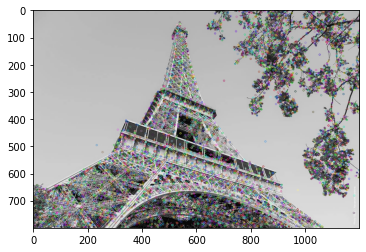

In [45]:
import numpy as np
import cv2 as cv
img = cv.imread('tower.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None) #find keypoints i.e. special structure
img=cv.drawKeypoints(gray,kp,img)
# cv.imwrite('tower_sift_keypoints.jpg',img)
plt.imshow(img)

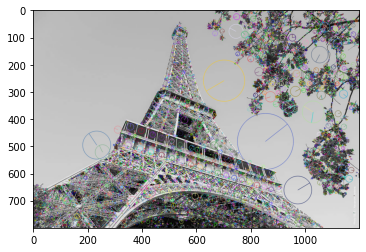

In [46]:
# draw
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv.imwrite('tower_sift_keypoints1.jpg',img)
plt.imshow(img)

In [44]:
sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray,None) #compute descriptors from the keypoints

# Brute-Force Matching with SIFT descriptors

In [52]:
import numpy as np
import cv2 as cv
img = cv.imread('tower.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray,None) 

img1 = cv.imread('tower1.jpg')
gray1= cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
kp1, des1 = sift.detectAndCompute(gray1,None) 

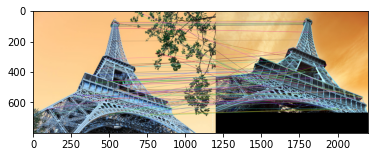

In [53]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des,des1,k=2)
good = []
for m,n in matches:
    if m.distance<0.75*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(img,kp, img1,kp1,good[:100],None,flags=2)

plt.imshow(img3)

# KNN cluster 
### Color Quantization

In [58]:
import numpy as np
import cv2 as cv
img = cv.imread('tower.jpg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2 #
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv.imshow('res2',res2)
cv.waitKey(0)
cv.destroyAllWindows()

# Hierarchical(Agglomerative) Clustering

In [61]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, random_state=100)
from sklearn import cluster
agg = cluster.AgglomerativeClustering(n_clusters=3)

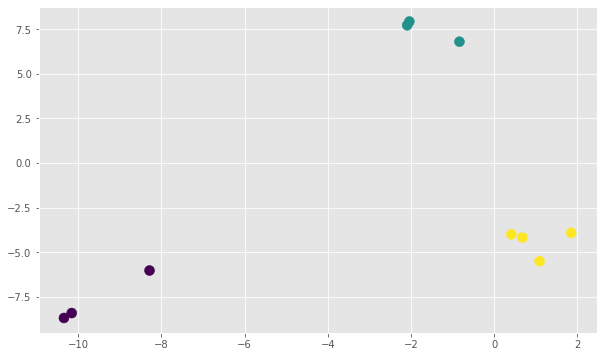

In [63]:
labels = agg.fit_predict(X)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100)